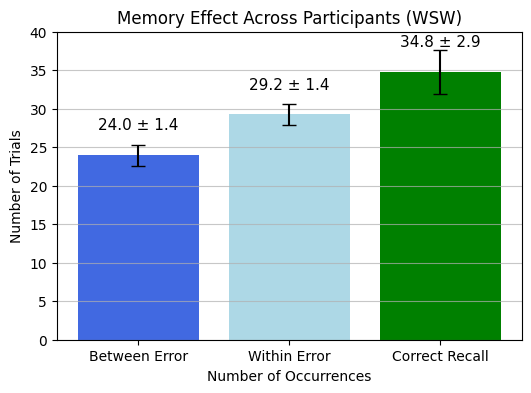

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv(f'/Users/graceliu/Desktop/ColumbiaThesis/data/trial_by_trial_WSW.csv')

total_trials = len(data) / 32

grouped = data.groupby("subj_id")

participant_data = pd.DataFrame({
    "Within Error": grouped["within_error"].sum(), 
    "Between Error": grouped["between_error"].sum() * 0.75,  #correct by 0.75
    "Correct Recall": grouped["correct"].sum() 
})

means = participant_data.mean()
std_errors = participant_data.std() / np.sqrt(len(participant_data)) 

sorted_means = means.sort_values()
sorted_std_errors = std_errors[sorted_means.index]

colors = {"Within Error": "lightblue", "Between Error": "royalblue", "Correct Recall": "green"}

plt.figure(figsize=(6, 4))
bars = plt.bar(sorted_means.index, sorted_means, yerr=sorted_std_errors, capsize=5, 
        color=[colors[label] for label in sorted_means.index])
plt.xlabel("Number of Occurrences")
plt.ylabel("Number of Trials")
plt.title("Memory Effect Across Participants (WSW)")
plt.ylim(0, 40)  # Y-axis from 0 to 96 trials
plt.grid(axis="y", alpha=0.7)

for bar, label, mean, se in zip(bars, sorted_means.index, sorted_means, sorted_std_errors):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 3.3, 
             f"{mean:.1f} ± {se:.1f}", ha="center", fontsize=11)

plt.show()